In [ ]:
pip install wordcloud

In [2]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

df_sns = pd.read_csv("df_sns.csv")

# client=pymongo.MongoClient("trainings.iptime.org",48003)
# # client=pymongo.MongoClient("192.168.10.240",27017)
# db= client['AI_LKJ']
# yeomi_review = db['yeomi_review']
# yeomi_review = yeomi_review.find()
# yeomi_review = pd.DataFrame(yeomi_review)
# kto9suk9suk_review = db['kto9suk9suk_review']
# kto9suk9suk_review = kto9suk9suk_review.find()
# kto9suk9suk_review = pd.DataFrame(kto9suk9suk_review)

In [3]:
df_sns

,index,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,region,city
0,1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,NaN,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일,NaN,NaN
1,2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,NaN,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일,NaN,NaN
2,5,65f99f8b08bfcc46ca193522,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,NaN,qQx_BQTTBH,저 말이 되고싶어요^^,2014년 7월 10일,제주,#제주
3,6,65f99f8b08bfcc46ca193523,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,NaN,qQx_BQTTBH,Beautiful~,2014년 7월 10일,제주,#제주
4,8,65f99f8d08bfcc46ca193525,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,NaN,qTGZrrzTAH,근데 명산도는 3~4월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은...,2014년 8월 5일,울산,"울산 , #울산"
...,...,...,...,...,...,...,...,...,...,...,...
593961,599152,662af285f231019cd5b6186d,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,NaN,C6I3IZBhfzp,@ssukssuk_growup,2024년 4월 24일,경남,#거창
593962,599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,NaN,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일,서울,"서울 , #서울"
593963,599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,NaN,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일,서울,"서울 , #서울"
593964,599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,NaN,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일,서울,"서울 , #서울"


# 데이터 전처리

## 여행에 미치다 페이지에서 국내 여행 게시글만 가져오기

In [2]:
list_region = ['#강원','#경기','#경남','#경북','#광주','#대구','#대전','#부산','#서울','#세종','#울산','#인천','#전남','#전북','#제주','#충남','#충북','#강릉','#고성','#동해','#삼척','#속초','#양구','#양양','#영월','#원주','#인제','#정선','#철원','#춘천','#태백','#평창','#홍천','#화천','#횡성','#가평','#고양','#과천','#광명','#광주','#구리','#군포','#김포','#남양주','#동두천','#부천','#성남','#수원','#시흥','#안산','#안성','#안양','#양주','#양평','#여주','#연천','#오산','#용인','#의왕','#의정부','#이천','#파주','#평택','#포천','#하남','#화성','#거제','#거창','#고성','#김해','#남해','#밀양','#사천','#산청','#양산','#의령','#진주','#창녕','#창원','#통영','#하동','#함안','#함양','#합천','#경산','#경주','#고령','#구미','#김천','#문경','#봉화','#상주','#성주','#안동','#영덕','#영양','#영주','#영천','#예천','#울릉','#울진','#의성','#청도','#청송','#칠곡','#포항','#광산','#남구','#동구','#북구','#서구','#군위','#남구','#달서','#달성','#동구','#북구','#서구','#수성','#중구','#대덕','#동구','#서구','#유성','#중구','#강서','#금정','#기장','#남구','#동구','#동래','#부산진','#북구','#사상','#사하','#서구','#수영','#연제','#영도','#중구','#해운대','#강남','#강동','#강북','#강서','#관악','#광진','#구로','#금천','#노원','#도봉','#동대문','#동작','#마포','#서대문','#서초','#성동','#성북','#송파','#양천','#영등포','#용산','#은평','#종로','#중구','#중랑','#남구','#동구','#북구','#울주','#중구','#강화','#계양','#남동','#동구','#미추홀','#부평','#서구','#연수','#옹진','#중구','#강진','#고흥','#곡성','#광양','#구례','#나주시','#담양','#목포','#무안','#보성','#순천','#신안','#여수','#영광','#영암','#완도','#장성','#장흥','#진도','#함평','#해남','#화순','#고창','#군산','#김제','#남원','#무주','#부안','#순창','#완주','#익산','#임실','#장수','#전주','#정읍','#진안','#서귀포','#제주','#계룡','#공주','#금산','#논산','#당진','#보령','#부여','#서산','#서천','#아산','#예산','#천안','#청양','#태안','#홍성','#괴산','#단양','#보은','#영동','#옥천','#음성','#제천','#증평','#진천','#청주','#충주']
korea_trip = []
for i in yeomi_review[yeomi_review['review_content'].isna()]['card_content']:
    for j in list_region:
        if j in i:
            korea_trip.append(i)
            break
condition_region = f"card_content in {korea_trip}"
korea_yeomi_review = yeomi_review.query(condition_region)
korea_yeomi_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
201,65f9bf4f08bfcc46ca193606,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,NaN,NaN
202,65f9bf4f08bfcc46ca193607,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@shorokhofff,2018년 6월 22일
203,65f9bf4f08bfcc46ca193608,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@soye0114 여기 다니엘 뮤비 찍은곳인가???!!!,2018년 2월 24일
204,65f9bf5008bfcc46ca193609,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@h.a.ing 요기봐 ㅋㅋㅋㅋㅋㅋ,2018년 2월 8일
205,65f9bf5008bfcc46ca19360a,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@dal.hye 야 나 여기 가고싶어ㅠㅠㅠ,2018년 1월 28일
...,...,...,...,...,...,...,...,...
1152424,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
1152425,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
1152426,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
1152427,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


## 구석구석 페이지와 여행에 미치다 페이지에서 가져온 데이터 합치기

In [4]:
kto9suk9suk_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
125933,662a1fb44a4fe5fadf3f71ee,신규 개장 기념 무료 운영 중(~5/6)‼ 짜릿함 최고인😆 김천 #사계절썰매장\n\...,2024년 4월 25일,106,,C6LYPKTSzun,🛷,2024년 4월 25일
125934,662f1d43b33c9dc30aa95f3f,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN
125935,662f1d4bb33c9dc30aa95f40,범선의 휘황찬란한 실루엣이 영덕 대게를 먹으러 찾는 방문객을 반기는 이곳 +_+ 대...,2014년 8월 26일,100,,sJhwZxzTCf,NaN,NaN
125936,662f22cb5cb025207273f6f6,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN


In [5]:
df_sns = pd.concat([kto9suk9suk_review, korea_yeomi_review], ignore_index=True)
df_sns = df_sns[df_sns['review_content'].notna()]
df_sns = df_sns.reset_index()
df_sns

,index,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
1,2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
2,5,65f99f8b08bfcc46ca193522,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,저 말이 되고싶어요^^,2014년 7월 10일
3,6,65f99f8b08bfcc46ca193523,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,Beautiful~,2014년 7월 10일
4,8,65f99f8d08bfcc46ca193525,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,근데 명산도는 3~4월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은...,2014년 8월 5일
...,...,...,...,...,...,...,...,...,...
593961,599152,662af285f231019cd5b6186d,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,@ssukssuk_growup,2024년 4월 24일
593962,599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
593963,599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
593964,599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


## 어느 지역에 관한 표시

In [6]:
region_gw = ['강원도 ','강원 ','강원특별자치도 ','#강원','#강릉', '#고성', '#동해', '#삼척', '#속초', '#양구', '#양양', '#영월', '#원주', '#인제', '#정선', '#철원', '#춘천', '#태백', '#평창', '#홍천', '#화천', '#횡성']
region_gg = ['경기도 ','경기 ','#경기','#가평', '#고양', '#과천', '#광명', '#구리', '#군포', '#김포', '#남양주', '#동두천', '#부천', '#성남', '#수원', '#시흥', '#안산', '#안성', '#안양', '#양주', '#양평', '#여주', '#연천', '#오산', '#용인', '#의왕', '#의정부', '#이천', '#파주', '#평택', '#포천', '#하남', '#화성']
region_gn = ['경상남도 ','경남 ','#경남 ','#거제', '#거창', '#고성', '#김해', '#남해', '#밀양', '#사천', '#산청', '#양산', '#의령', '#진주', '#창녕', '#창원', '통영', '#하동', '#함안', '#함양', '#합천']
region_gb = ['경상북도 ','경북 ','#경북','#경산', '#경주', '#고령', '#구미', '#김천', '#문경', '#봉화', '#상주', '#성주', '#안동', '#영덕', '#영양', '#영주', '#영천', '#예천', '#울릉', '#울진', '#의성', '#청도', '#청송', '#칠곡', '#포항']
region_gj = ['광주광역시 ','광주 ','#광주','#광산']
region_dg = ['대구광역시 ','대구 ','#대구','#군위', '#달서', '#달성', '#수성']
region_dj = ['대전광역시 ','대전 ','#대전','#대덕',   '#유성']
region_sj = ['세종특별자치시 ','세종 ','#세종']
region_bs = ['부산특별시 ','부산 ','#부산', '#금정', '#기장',  '#동래', '#부산진', '#사상', '#사하',  '#수영', '#연제', '#영도',  '#해운대']
region_su = ['서울특별시 ','서울 ','#서울','#강남', '#강동', '#강북', '#관악', '#광진', '#구로', '#금천', '#노원', '#도봉', '#동대문', '#동작', '#마포', '#서대문', '#서초', '#성동', '#성북', '#송파', '#양천', '#영등포', '#용산', '#은평', '#종로',  '#중랑']
region_us = ['울산광역시 ', '울산 ','#울산', '#울주']
region_ic = ['인천광역시 ','인천 ','#인천','#강화', '#계양', '#남동',  '#미추홀', '#부평',  '#연수', '#옹진']
region_jn = ['전라남도 ','전남 ','#강진', '#전남','#고흥', '#곡성', '#광양', '#구례', '#나주', '#담양', '#목포', '#무안', '#보성', '#순천', '#신안', '#여수', '#영광', '#영암', '#완도', '#장성', '#장흥', '#진도', '#함평', '#해남', '#화순']
region_jb = ['전라북도 ','전북 ','#고창', '#전북','#군산', '#김제', '#남원', '#무주', '#부안', '#순창', '#완주', '#익산', '#임실', '#장수', '#전주', '#정읍', '#진안']
region_jj = ['제주특별자치도 ','제주 ','#서귀포', '#제주']
region_cn = ['충청남도 ','충남 ','#충남','#계룡', '#공주', '#금산', '#논산', '#당진', '#보령', '#부여', '#서산', '#서천', '#아산', '#예산', '#천안', '#청양', '#태안', '#홍성']
region_cb = ['충청북도 ','충북 ','#충북','#괴산', '#단양', '#보은', '#영동', '#옥천', '#음성', '#제천', '#증평', '#진천', '#청주', '#충주']

In [7]:
from collections import Counter

for i in range(len(df_sns)):
    region_tour=[]
    city_tour = []
    for j in region_gw:
        if j in df_sns['card_content'][i]:
            region_tour.append('강원')
            city_tour.append(j)
    for j in region_gg:
        if j in df_sns['card_content'][i]:
            region_tour.append('경기')
            city_tour.append(j)
    for j in region_gn:
        if j in df_sns['card_content'][i]:
            region_tour.append('경남')
            city_tour.append(j)
    for j in region_gj:
        if j in df_sns['card_content'][i]:
            region_tour.append('광주')   
            city_tour.append(j)
    for j in region_gb:
        if j in df_sns['card_content'][i]:
            region_tour.append('경북')   
            city_tour.append(j)
    for j in region_sj:
        if j in df_sns['card_content'][i]:
            region_tour.append('세종')   
            city_tour.append(j)
    for j in region_dg:
        if j in df_sns['card_content'][i]:
            region_tour.append('대구')
            city_tour.append(j)
    for j in region_dj:
        if j in df_sns['card_content'][i]:
            region_tour.append('대전')
            city_tour.append(j)
    for j in region_bs:
        if j in df_sns['card_content'][i]:
            region_tour.append('부산')
            city_tour.append(j)
    for j in region_su:
        if j in df_sns['card_content'][i]:
            region_tour.append('서울')
            city_tour.append(j)
    for j in region_us:
        if j in df_sns['card_content'][i]:
            region_tour.append('울산')
            city_tour.append(j)
    for j in region_ic:
        if j in df_sns['card_content'][i]:
            region_tour.append('인천')
            city_tour.append(j)
    for j in region_jn:
        if j in df_sns['card_content'][i]:
            region_tour.append('전남')    
            city_tour.append(j)
    for j in region_jb:
        if j in df_sns['card_content'][i]:
            region_tour.append('전북')
            city_tour.append(j)
    for j in region_jj:
        if j in df_sns['card_content'][i]:
            region_tour.append('제주')
            city_tour.append(j)
    for j in region_cn:
        if j in df_sns['card_content'][i]:
            region_tour.append('충남')
            city_tour.append(j)
    for j in region_cb:
        if j in df_sns['card_content'][i]:
            region_tour.append('충북')
            city_tour.append(j)
    word_region = Counter(region_tour)
    most_common_region = word_region.most_common(1)
    most_common_region_keys = [word for word, count in most_common_region]
    word_city = Counter(city_tour)
    most_common_city = word_city.most_common(1)
    most_common_city_keys = [word for word, count in most_common_city]
    df_sns.loc[i, 'region'] = ", ".join(most_common_region_keys)
    df_sns.loc[i, 'city'] = ", ".join(city_tour)


## 댓글에 관한 데이터와 제목에 관한 데이터 분류

In [8]:
df_sns.to_csv('df_sns.csv',index=False)


In [9]:
df_sns

,index,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,region,city
0,1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일,,
1,2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일,,
2,5,65f99f8b08bfcc46ca193522,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,저 말이 되고싶어요^^,2014년 7월 10일,제주,#제주
3,6,65f99f8b08bfcc46ca193523,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,Beautiful~,2014년 7월 10일,제주,#제주
4,8,65f99f8d08bfcc46ca193525,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,근데 명산도는 3~4월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은...,2014년 8월 5일,울산,"울산 , #울산"
...,...,...,...,...,...,...,...,...,...,...,...
593961,599152,662af285f231019cd5b6186d,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,@ssukssuk_growup,2024년 4월 24일,경남,#거창
593962,599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일,서울,"서울 , #서울"
593963,599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일,서울,"서울 , #서울"
593964,599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일,서울,"서울 , #서울"


In [9]:
df_sns['review_content'] = df_sns['review_content'].astype('str')

## 태그와 관련된 단어 제거

In [11]:
def split(text):
    clean_text = []
    for word in text.split():
        if word.startswith('@'):
            pass
        else:
            clean_text.append(word)
    return " ".join(clean_text)

In [12]:
df_sns.loc[:,'review_content'] = df_sns['review_content'].apply(split)
df_sns.query("review_content.str.contains('@')")

,index,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,region,city
390,459,65facb853d093f346325208f,경기도 #양평 세미원 에서 만난 싱그러운 초록 풍경! It's healing tim...,2014년 9월 9일,118,NaN,stleS6TTAe,수경아 세미원이다!^@^ 우리가 걸어온 길...ㅎㅎ,2014년 9월 9일,경기,"경기도 , #양평"
578,690,65fbdbf9e60f7a9a412f0446,붉은빛과 푸른빛이 영롱하게 물 위로 쏟아져 내리는 여기는 대전 엑스포 다리! 견우직...,2014년 10월 23일,125,NaN,ufCjFazTDs,ㅋㅋㅋㅋ #나도절절한사랑좀 ㅋㅋㅋㅋ@yoon.km,2014년 10월 23일,대전,"대전 , #대전"
673,811,65fbdc36e60f7a9a412f04bf,경산시장에서 만난 뜨끈하고 매콤한 어묵꼬치! 따뜻한 국물이 좋은걸 보니 겨울이 성큼...,2014년 11월 18일,145,NaN,vh6aTcTTKr,아대박...@jammang_,2014년 11월 18일,경북,#경산
997,1230,65fd6a598cbcc379b4584772,길었던 연휴의 막바지. 새로운 한 주를 준비하며 여유로운 멋이 흐르는 충북 영동 월...,2015년 2월 22일,177,NaN,zYx5axTTFt,저긴 아직도 미지의 세계.....ㅋㅋㅋㅋㅋㅋ@mis_7211,2015년 3월 23일,충북,"충북 , #영동"
1032,1275,65fe13048cbcc379b45855fa,갓 구워진 따끈따끈한 파이 냄새가 여기까지 전해지는 것 같지 않나요~? :) 이곳은...,2015년 3월 4일,135,NaN,zzADJhTTC5,앗~!! 거두리.....@.@ 주말이 되면 거두리 카페거리에서 커피한잔 하고싶어지네...,2015년 3월 4일,강원,#춘천
...,...,...,...,...,...,...,...,...,...,...,...
591412,596575,662a3ea54a4fe5fadf3f78a5,“안 되는걸 되게 하면 되잖아요“ 그래서 우리는 눈오리 대신 흙오리를 만든답니다?\...,2024년 1월 19일,12.4만,NaN,C2Q5szLhpdh,니@거덕,2024년 2월 22일,부산,"부산 , #부산"
591617,596780,662a3eb04a4fe5fadf3f7972,“안 되는걸 되게 하면 되잖아요“ 그래서 우리는 눈오리 대신 흙오리를 만든답니다?\...,2024년 1월 19일,12.4만,NaN,C2Q5szLhpdh,아닠ㅋㅋㅋㅋㅋ@look_atme_mi,2024년 1월 19일,부산,"부산 , #부산"
592408,597581,662a4d9ef231019cd5b5d3fa,“내가 서울 좀 안다?” 주목👀 #광고\n나만 알고싶은 서울의 숨은 장소가 있다면?...,2024년 2월 8일,1934,NaN,C3FYUTQBnWW,#관악구 #관악산연주대 가볍게 등산하기 너무 좋아요.❤️@jangyongseung4😍,2024년 2월 10일,서울,"#안산, 서울 , #서울, #서대문"
592685,597859,662a6853f231019cd5b5d7f8,이야 여기 컨셉 맛집이네 ㅋㅋㅋㅋㅋ👍\n\n세심한 부분까지 포인트 넘 잘 살린거 아...,2024년 2월 13일,6772,NaN,C3SB6jMhp6m,우린이제 컨겝이아니라@정말 줌마들이 되가는,2024년 2월 15일,인천,"인천 , #인천"


## 형태소 분류

In [16]:
stopwords = []
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def okt_clean(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                word_list.append(word)
    return " ".join(word_list)

In [17]:
# df_sns['review_clean_okt'] = df_sns['review_content'].apply(okt_clean)
# df_sns = df_sns.query('review_clean_okt != ""')

In [140]:
df_sns = df_sns.reset_index()
df_sns = df_sns[['card_content','card_date','card_like','card_watch','review_content','review_date','region','review_clean_okt']]

,card_content,card_date,card_like,card_watch,review_content,review_date,region,review_clean_okt
0,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,NaN,근데 명산도는 3~4월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은...,2014년 8월 5일,울산,명산 물이 평상시 여행
1,비가 내린 후에야 진정한 모습을 드러내는 시무지기폭포\n이 비경을 만나러 가는 고된...,2014년 7월 12일,39,NaN,무등산에 이런 폭포가 있는 줄 몰랐네요,2014년 7월 26일,광주,폭포
2,얼음같이 차고 맑은 물과 빽빽이 들어선 나무 숲길\n제주 서귀포 돈내코계곡의 시원한...,2014년 7월 13일,43,NaN,지난 제주도 여행때 가보지 못한 계곡이예요... 멋있당 다음 제주도 여행때 꼭 가봐...,2014년 8월 17일,제주,여행 다음 여행
3,얼음같이 차고 맑은 물과 빽빽이 들어선 나무 숲길\n제주 서귀포 돈내코계곡의 시원한...,2014년 7월 13일,43,NaN,다이빙하면 시원하겠어요~,2014년 8월 14일,제주,다이빙
4,햇살 아래 반짝이는 풋풋한 청보리의 물결\n바람에 넘실대는 싱그러운 초록빛~♡ #고...,2014년 7월 14일,57,NaN,인스타그램으로 오셨군요,2014년 8월 8일,전북,인스타그램
...,...,...,...,...,...,...,...,...
192019,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,NaN,고택에서 자고 또 종갓댁에서 해주시는 조식이라니…😍 최고,2024년 4월 24일,경남,고택 조식 최고
192020,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,NaN,언니 간곳 여긴가보오?,2024년 4월 25일,경남,언니 간곳
192021,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,NaN,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일,서울,장미 공원 시즌
192022,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,NaN,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일,서울,사람 추천


## 게시글별 댓글 수 확인

In [141]:
review_count = pd.pivot_table(df_sns,index='card_content',values='review_content',aggfunc='count')
review_count = review_count.reset_index()

'"꿈과 희망의 원더랜드가 바로 여기🎉🎉\n\n#울산 #남구 옥상에는 공중관람차가 있다?\n\n개점 20주년을 맞아 리뉴얼된 #울산그랜드휠 에 타면, 울산 시내가 한눈에👀 보이는 #야경맛집\n꿀팁하나 살포시...🤫 매표소는 1층에 있어서 미리 구매하고 올라가셔야 해요.\n\n📸@hookhook000 님\n📌우리 모두 건강한 일상으로 돌아가기 위해 방역수칙을 준수해 주세요!"'

## 친구, 가족과 관련된 단어를 포함한 댓글의 갯수 세기

In [143]:
df_sns_friend = df_sns.query("review_content.str.contains('형님|언니|친구|오빠|여친|남친')")
pivot_friend = pd.pivot_table(df_sns_friend,index = ['card_content'],values= 'review_content',aggfunc='count')
pivot_friend = pivot_friend.reset_index()

,card_content,card_date,card_like,card_watch,review_content,review_date,region,review_clean_okt
199,"천연의 자연경관, 원시 그대로를 간직한\n우리나라 최대의 늪지, 창녕 우포늪 :-)...",2014년 8월 12일,119,NaN,오빠여기 팔로우행,2014년 8월 12일,NaN,오빠
475,Since 1956 . 60년의 세월을 고스란히 간직하고 있는 #대학로 #학림다방입...,2015년 2월 10일,133,NaN,어려서는 아버지와 함께 와서 우유를.. 대학때는 친구들과 브라암스를 들으며 커피를....,2015년 4월 18일,NaN,아버지 우유 대학 친구 커피
531,조금 더 색다르게! 조금 더 건강한! 피자를 맛보세요~ 바삭하게 구워진 도우 사이에...,2015년 3월 20일,133,NaN,ㅋㅋㅋ 친구가 가자고 했던 집이긔,2015년 3월 21일,서울,친구 집이긔
533,조금 더 색다르게! 조금 더 건강한! 피자를 맛보세요~ 바삭하게 구워진 도우 사이에...,2015년 3월 20일,133,NaN,어..언니...여기야..,2015년 3월 20일,서울,언니
579,마음이 답답하고 울적할 때♬ 시원한 남해바다가 펼쳐지는 섬 완도로 힐링여행 떠나는 ...,2015년 4월 8일,128,NaN,#양은비_트블리7 마음이 답답하고 울적할 때🎶 저는 #부산 #해운대 로 간답니다~ ...,2015년 4월 24일,전남,마음 해운대 관광지 생각 시간 가지 친구 지하철 해운대역 길이 표시 출구 해운대 바...
...,...,...,...,...,...,...,...,...
191955,"이보다 아름다운 불꽃놀이는 없었다. 3월 23일 20시, 이월드 앵콜 불꽃쇼가 도도...",2024년 3월 21일,995,NaN,친구들이랑 꼭봐 ㅎㅎ,2024년 3월 21일,대구,친구
191974,두구🥁 두구🥁 3/22 14시! ‘경복궁별빛야행’ 티켓팅 오픈 소식 남기고 갑니다....,2024년 3월 21일,3200,NaN,친구 태그해서 경복궁 별빛야행 티켓팅 소식 알려주깅💌,2024년 3월 21일,서울,친구 태그 경복궁 별빛 야행 티켓팅 소식
191983,"드디어 다음주, 국가권력급 벚꽃맛집 ‘여의도’ 봄꽃축제 개막 (뿌뿌-)\n\n누가 ...",2024년 3월 23일,3091,NaN,친구 태그해서 축제 소식 알려주자 🎉,2024년 3월 23일,서울,친구 태그 축제 소식
191993,지금 제일 핫하다는 기안84 전시 ‘기안도(奇案島)’ 후기 🔥\n다들 여기서 기안8...,2024년 3월 26일,4752,NaN,친구 태그해서 기안84 전시 소식 알려주기🎨,2024년 3월 26일,서울,친구 태그 전시 소식


In [391]:
df_sns_family = df_sns.query("review_content.str.contains('할머니|할아버지|아빠|엄마|가족|아이|자식|아들|딸')")
pivot_family = pd.pivot_table(df_sns_family,index = ['card_content'],values= 'review_content',aggfunc='count')
pivot_family = pivot_family.reset_index()

## 친구, 가족 댓글이 있는 게시글의 총 댓글 수 추가

In [352]:
def total_count(row):
    for i in range(len(review_count)):
        if row == review_count.loc[i,'card_content']:
            counts = review_count.loc[i,'review_content']
    return counts

In [353]:
pivot_friend.loc[:,'total_count'] = pivot_friend['card_content'].apply(total_count)
pivot_family.loc[:,'total_count'] = pivot_family['card_content'].apply(total_count)

In [354]:
pivot_friend['count_ratio']= pivot_friend['review_content']/pivot_friend['total_count']
pivot_friend = pivot_friend.sort_values('count_ratio',ascending = False)
pivot_family['count_ratio']= pivot_family['review_content']/pivot_family['total_count']
pivot_family = pivot_family.sort_values('count_ratio',ascending = False)

## 총 댓글이 30개 이상이고, 전체 댓글 중 10%이상이 가족, 친구에 관한 내용인 게시글만 추출

In [355]:
pivot_friend_30 = pivot_friend.query("total_count >= 30")
pivot_friend_30 = pivot_friend_30.query("count_ratio >= 0.1")
pivot_friend_30 = pivot_friend_30.reset_index()
pivot_friend_30 = pivot_friend_30.loc[:,'card_content':]
pivot_family_30 = pivot_family.query("total_count >= 30")
pivot_family_30 = pivot_family_30.query("count_ratio >= 0.1")
pivot_family_30 = pivot_family_30.reset_index()
pivot_family_30 = pivot_family_30.loc[:,'card_content':]

## 게시글에 포함되어 있는 명사들만 추출

In [374]:
flower_list = ['부용','목향','마호가니','메타세콰이어','아카시아','단풍나무','은행나무','낙엽','꽃무릇','수레국화','참꽃','단풍','들꽃','마지기','꽃잔디','봄꽃','해바라기','수선화','목련','벚꽃','장미','라벤더','무궁화','황화','코스모스','국화','댑싸리','맨드라미','유채꽃','튤립','진달래','수국','배롱나무','매화','철쭉','산수유','유채','은행','팜파스','데이지','개나리','맥문동']
stopwords =['공과금','방법','이후','추첨','계정','이번','모습','당첨','경품','예정','기간','경우','선정','장소','참여','상품','개별','참고','오픈','할머니','할아버지','아빠','엄마','가족','느낌','시간','이유','확인','가능','운영','이벤트','이용','댓글','사람','휴가','취미','펭수','간정','아워플래닛','케이스','화개면', '합천군','이모','강화군','연천군','인권','고창군','광역시','무주군','나주','입국','개항','검사','머리','배경화면','청양군','대통령','역대','여권','합격자','정부','청사','발표','상환','금융','재단','계약','새해','연말','하락','수상작','말티재','신용카드','원리금','엽서','헬기','스마트','겨울왕국','소통','하늘정원','난산','보롬왓','청산도','가파도','사승봉도','백제','관광','디지털','평점','거래','카드','평화','백호','수칙','확산','대국민','금요일','가사','마음','심쿵','제발','혼인','발생','시점','내용','내외','상황','사전','미션','신용','대출','두기','거리','지역','발대식','취재','기사','사회','연체','약정', '금리','할부','단계','농협카드','일부','자단','격상','로컬힙','여행지','추천','풍경','마을','국내','여행','스타','그램','구석구석','가을','겨울','여름','봄','사진','위치','모두','일상','방역','준수','트래블','리더','시작','제공']
# stopwords = ['참고','사람','댓글','이벤트','친구','시간','이용','운영','길이','근처','여행','생각','이유','여름','가을','겨울','당첨','발표']
list_region = ['울릉군','영양군','암산','장림','함안군','달성군','옥천군','담양군','산청군','예천군','영월군','양양군','하동군','창녕군','보성군','해남군','강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북','강릉','고성','동해','삼척','속초','양구','양양','영월','원주','인제','정선','철원','춘천','태백','평창','홍천','화천','횡성','가평','고양','과천','광명','광주','구리','군포','김포','남양주','동두천','부천','성남','수원','시흥','안산','안성','안양','양주','양평','여주','연천','오산','용인','의왕','의정부','이천','파주','평택','포천','하남','화성','거제','거창','고성','김해','남해','밀양','사천','산청','양산','의령','진주','창녕','창원','통영','하동','함안','함양','합천','경산','경주','고령','구미','김천','문경','봉화','상주','성주','안동','영덕','영양','영주','영천','예천','울릉','울진','의성','청도','청송','칠곡','포항','광산','남구','동구','북구','서구','군위','남구','달서','달성','동구','북구','서구','수성','중구','대덕','동구','서구','유성','중구','강서','금정','기장','남구','동구','동래','부산진','북구','사상','사하','서구','수영','연제','영도','중구','해운대','강남','강동','강북','강서','관악','광진','구로','금천','노원','도봉','동대문','동작','마포','서대문','서초','성동','성북','송파','양천','영등포','용산','은평','종로','중구','중랑','남구','동구','북구','울주','중구','강화','계양','남동','동구','미추홀','부평','서구','연수','옹진','중구','강진','고흥','곡성','광양','구례','나주시','담양','목포','무안','보성','순천','신안','여수','영광','영암','완도','장성','장흥','진도','함평','해남','화순','고창','군산','김제','남원','무주','부안','순창','완주','익산','임실','장수','전주','정읍','진안','서귀포','제주','계룡','공주','금산','논산','당진','보령','부여','서산','서천','아산','예산','천안','청양','태안','홍성','괴산','단양','보은','영동','옥천','음성','제천','증평','진천','청주','충주']
stopwords.extend(list_region) 
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def Tokenizer(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                if word in flower_list:
                    word = "꽃"
                if word in ['촬영','카메라']:
                    word = '사진'
                
                word_list.append(word)
    return " ".join(word_list)

In [375]:
pivot_friend_30['card_clean_okt'] = pivot_friend_30['card_content'].apply(Tokenizer)
pivot_family_30['card_clean_okt'] = pivot_family_30['card_content'].apply(Tokenizer)
review_count['card_clean_okt'] = review_count['card_content'].apply(Tokenizer)

## 워드 클라우드로 표현
- 전체 : "코스","공원","체험","방문","맛집","꽃","사진"
- 친구 : "분위기","공간","사진","인생","입장","꽃"
- 가족 : "추억","캠핑","해변","고향"

In [376]:
text_friend = ' '.join(pivot_friend_30['card_clean_okt'])
text_family = ' '.join(pivot_family_30['card_clean_okt'])
text_total = ' '.join(review_count['card_clean_okt'])

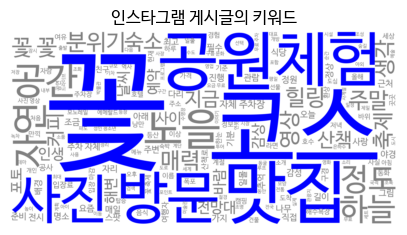

In [405]:
highlighted_words = ["코스","공원","체험","방문","맛집","꽃",'사진']

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상
        
from wordcloud import WordCloud
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_text(text_total)
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('인스타그램 게시글의 키워드')
plt.axis('off')
plt.show()


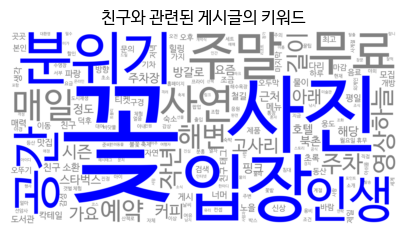

In [398]:
highlighted_words = ["분위기","공간","사진","인생","입장","꽃"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상
        
from wordcloud import WordCloud
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_text(text_friend)
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('친구와 관련된 게시글의 키워드')
plt.axis('off')
plt.show()


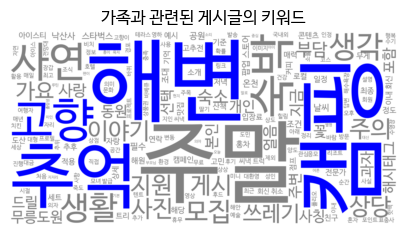

In [402]:
highlighted_words = ["추억","캠핑","해변","고향"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상
        
from wordcloud import WordCloud
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_text(text_family)
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('가족과 관련된 게시글의 키워드')
plt.axis('off')
plt.show()


## 친구, 가족에 자주 등장하는 단어들의 의미 확인

## LDA

In [381]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.9,min_df=2,ngram_range=(1,2))
features = tfidfVectorizer.fit_transform(review_count['card_clean_okt'])
features.toarray()[:2]
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['가가', '가게', '가게 구경', ..., '힐링 파크', '힐링 프로그램', '힐링 힐링'],
      dtype=object)

In [382]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_10 = LatentDirichletAllocation(n_components=3, random_state=36) #인스턴스화 #n_components 토픽의 갯수
lda_model_10.fit(features)
import pandas as pd
pd.set_option('display.max_colwidth', None)
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda_model_10.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:5])# 시리즈 형식으로 출력 get values from series / index 
    topics_list.append(topics_text)
topics_list_add_10 = [['Topic1', 'Topic2','Topic3',],topics_list]
df_topics_keywords_10 = pd.DataFrame(topics_list_add_10)
df_topics_keywords_10=df_topics_keywords_10.T
df_topics_keywords_10

,0,1
0,Topic1,축제 기자 트블리 그림 사진
1,Topic2,해시태그 소개 야경 인스타그램 오늘
2,Topic3,노을 코스 주차장 분위기 하늘


In [383]:
list_topics = []
for i in range(len(lda_model_10.components_)):
    df_datas_0 = [lda_model_10.components_[i], dictionary_list]
    df_topics_0 = pd.DataFrame(data=df_datas_0).T
    df_topics_0 = df_topics_0.dropna()
    df_topics_0 = df_topics_0.sort_values(0, ascending=False).reset_index()
    df_topics_0.rename(columns = {1 : i+1}, inplace = True)
    df_topics_0.rename(columns = {0 : 'score'}, inplace = True)
    list_topics.append(df_topics_0.loc[:4,['score',i+1]])
df_topic = pd.concat(list_topics,axis=1)
df_topic

,score,1,score,2,score,3
0,30.785979,축제,14.52107,해시태그,39.256973,노을
1,23.060291,기자,14.037603,소개,38.735107,코스
2,22.255973,트블리,13.718607,야경,32.72607,주차장
3,18.573991,그림,13.307526,인스타그램,32.265787,분위기
4,17.770328,사진,12.614766,오늘,30.854598,하늘


In [384]:
import pyLDAvis
import pyLDAvis.lda_model
vis_10 = pyLDAvis.lda_model.prepare(lda_model_10,features,tfidfVectorizer)
vis_10
pyLDAvis.enable_notebook()
components_10_display = pyLDAvis.display(vis_10)
components_10_display

In [385]:
# grid_best_model.fit(features)
import pandas as pd
pd.set_option('display.max_colwidth', None)
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda_model_10.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)

In [386]:
topics_output = lda_model_10.transform(features)
df_topics_score = pd.DataFrame(topics_output)
df_topics_score['dominant_topic_number']=np.argmax(topics_output, axis=1)
df_topics_score['dominant_topic_number'].value_counts()

dominant_topic_number
2    2535
0    1210
1     647
Name: count, dtype: int64

In [388]:
review_count.loc[:,'content_topic'] = df_topics_score['dominant_topic_number']
review_count.query("content_topic==0")

,card_content,review_content,card_clean_okt,content_topic
2,"""너 거기 가 #봄?"" #강원도 #삼척 #유채꽃축제 에서 발길 닿는 곳마다 노랗게 꽃망울을 터트린 아름다운 유채꽃 물결에 내 마음은 설레나 #봄\n\n#강원도여행 #꽃 #봄꽃 #봄 #유채꽃 #축제\n#여행그램 #여행 #국내여행 #봄여행 #봄나들이\n#꽃스타그램 #꽃여행 #플라워그램 (사진_한국관광공사 김지호)",1,발길 꽃망울 꽃 물결 공사,0
4,"""너 거기 가 #봄?"" 청명한 하늘아래 #경주 #반월성 에서 즐기는\n향긋한 봄내음과 어우러진 아름다운 꽃들의 향연\n\n#경주여행 #꽃 #봄꽃 #봄 #튤립 #유채꽃 #벚꽃\n#여행그램 #여행 #국내여행 #봄여행 #봄나들이\n#꽃스타그램 #꽃여행 #플라워그램\n(사진_Seifali Kazemi 님)",2,청명 하늘아래 봄내음 향연,0
6,"""사랑의 고백""의 뜻을 가지고 있는 #튤립. 사랑하는 연인과 낭만적인 봄을 보내고 싶다면 에버랜드 튤립축제에서 사랑 고백을 해보는 것은 어떨까요?? #용인 #에버랜드 #튤립축제 #사랑 #연인 #고백 #슈퍼파워 #Yongin #everland #tulipfestival #love #couple #superpower",1,사랑 고백 가지 사랑 연인 낭만 튤립축제 사랑 고백,0
9,"""힘든 이 시간이 어서 지나가고,\n모두가 자유로운 일상으로 돌아오게 해주세요🙏🏻""\n⠀\n소원을 빌면 이루어질 것만 같은\n이곳은 #충주 #중앙탑공원 !\n⠀\n중앙탑과 보름달의 고즈넉한 분위기가 아름다워\n충주 시민들에게 #인생샷 명소로 소문이 자자한 곳이지요.\n⠀\n중앙탑공원은 최근 종영한 드라마\n#사랑의불시착 의 촬영지이기도 한데요.\n⠀\n드라마 속 주인공이 되어\n#탄금호무지개길 을 걷는다면,\n색다른 추억을 남길 수 있지 않을까요?˃̵͈̑ᴗ˂̵͈̑\n⠀\n모두가 마음 놓고 여행을 즐길 수 있을 때까지\n#힘내라대한민국 !\n⠀\n🇰🇷 #국내여행 은 #대한민국구석구석\n📷@dear.syrup @shinehwii",21,소원 중앙 보름달 분위기 시민 명소 소문 중앙 공원 최근 종영 드라마 사진 드라마 주인공 추억,0
10,#2017 #올해의관광도시 #강릉\n우리나라 최고의 #드라이브코스 로 꼽히는 #헌화로!\n해안길 드라이브의 낭만을 느껴보세요~\n.\n(사진_2016 트래블로거 김노을),6,최고 드라이브 낭만 노을,0
...,...,...,...,...
4371,🤚부처님의 손바닥같은 거대한 기암괴석이 있는 이곳은 #남해 #보리암 입니다.\n\n기존에 보던 보리암의 풍경 모습과 조금 색다른 구도의 풍경인데요!\n소박한 모습의 기와집 뒤로 단단하게 버티고 있는 모습이\n마치 만화에서나 등장할 법한 모습입니다\n\n청명한 하늘을 가르며 우뚝 서 있는 보리암의 풍경을 보며☁️\n수요고개를 상쾌하게 넘어보세요◟( ˘ ³˘)◞ ♡\n\n📸@kimhakjaelandscape 님\n\n★코로나19의 확산으로 수도권 및 일부 지역이 #사회적거리두기 2.5단계로 격상되었습니다. 우리 모두 건강한 일상으로 돌아가기 위해 방역수칙을 준수해 주세요.,10,손바닥 괴석 기존 조금 구도 기와집 만화 등장 청명 하늘 고개 수도권,0
4372,🤭\n오늘자 하늘에 불 났다는 서울의 퇴근길\n어둑어둑 해지면서 완전 라라랜드 되어버렸어요👀\n.\n.\n@_dino_pic\n#여행에미치다 #서울 #선셋 #노을 #seoul #Korea #Sunset,62,오늘 하늘 퇴근길 해지 완전 라라 랜드,0
4376,"🥳2030 부산세계박람회 유치 기원🥳\n\n바다를 움직이는 파도처럼🌊 세계를 움직이고 있는 부산🕊️\n2030 부산세계박람회의 성공적인 유치를 기원하며\n별빛이 내리는 아름다운 #부산여행코스 를 소개합니다.\n\n✨ #다대포생태탐방로 (1, 2)\n✨ #노을정휴게소 (3, 4)\n✨ #송도구름산책로 (5)\n✨ #송도해상케이블카 (6)\n✨ #호천마을 (7)\n\n📷 다님 4기 이철현, 황정빈 님 제공",5,세계박람회 유치 기원 파도처럼 세계 세계박람회 성공 유치 기원 별빛 소개 황정,0
4377,🥵 더울 땐 역시 동굴 아님? 🧊\n\n한여름에 동굴 안에서 덜덜(?) 떨면서 투명카약 타면 을매나 재밌게요~\n\n📍충주 활옥동굴\n충북 충주시 목벌안길 26\n입장료 : 성인 1만원 (입장료+카약 패키지의 경우 1.3만원!)\n\n🤳 여미 페이스북 그룹 앨리스님 @travelaaalice\n\n활옥동굴 외에도 전국에 있는 멋진 동굴 댓글로 추천해주시면 모아서\n다시 한 번 여름여행지 콘텐츠로 소개해드릴게요 💟\n\n#여미 #충주 #활옥동굴 #충주여행 #여미_충주,386,동굴 동굴 투명 카약 활옥 동굴 입장료 성인 입장료 카약 패키지 그룹 활옥 동굴 전국 동굴 콘텐츠 소개,0
